In [61]:
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
twitter_archive_df=pd.read_csv("twitter-archive-enhanced.csv")

In [63]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [64]:
# Downloading and saving the image prediction data using Requests
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
# GET the file name programmatically
file_name = 'image-predictions.tsv'
# Write the file with the context manager with:
with open(file_name, 'wb') as file:
     file.write(response.content)

In [65]:
image_predictions_df= pd.read_csv('image-predictions.tsv',sep='\t')

In [66]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
consumer_key = '***************************'
consumer_secret = '***************************'
access_token = '***************************'
access_secret = '***************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [8]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'wb') as file:
        for tweet_id in df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)


In [9]:
exp_tweet = api.get_status(twitter_archive_df.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
content

TweepError: [{'code': 215, 'message': 'Bad Authentication data.'}]

In [67]:
#Reading 'tweet_json.txt' file line by line and creating dataframe
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df_now = pd.DataFrame(df_list)
api_df_now.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Data Assessing

In [68]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [69]:
twitter_archive_df.name.value_counts()

None          745
a             55 
Charlie       12 
Lucy          11 
Oliver        11 
              .. 
Longfellow    1  
Dobby         1  
Lillie        1  
Buddah        1  
Luther        1  
Name: name, Length: 957, dtype: int64

In [70]:
twitter_archive_df.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [71]:
twitter_archive_df.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [72]:
twitter_archive_df.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [73]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [74]:
 pd.set_option('display.max_colwidth', -1)
twitter_archive_df[twitter_archive_df['rating_numerator'] > 15 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [75]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [76]:
pd.set_option('display.max_colwidth', -1)
twitter_archive_df[twitter_archive_df['rating_numerator'] < 6]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3,10,a,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.c

In [77]:
#Find all denominators that are not equal to 10
twitter_archive_df[twitter_archive_df.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [78]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [79]:
api_df_now.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [80]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [81]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [82]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [83]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [84]:
sum(image_predictions_df. img_num.isnull())

0

In [85]:
image_predictions_df.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [86]:
image_predictions_df[image_predictions_df.img_num.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [87]:
twitter_archive_df.shape

(2356, 17)

In [88]:
image_predictions_df.shape

(2075, 12)

In [89]:
api_df_now.shape

(2354, 3)

In [90]:
 #check the duplicated columns in all tables
all_columns = pd.Series(list(twitter_archive_df)+ list(image_predictions_df)+ list(api_df_now))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Assessment Summery
*Quality aspects
Archive table

 1- un required retweets and replies(’in_reply_to_status_id’,’in_reply_to_user_id’,’retweeted_status_id’,
’retweeted_status_user_id’, ’retweeted_status_timestamp’)

2- wrong data type in timestamp and tweet_id

3- expanded_urls which didn't have image

4- rating_numerator which has values > 15 and < 6 and some contain decimals

5- rating_demoniator have values not equal 10

6- missing values in name, doggo,floofer,pupper,puppo

7- weird names in name column

Image prediction table

8- wrong datatype (tweet_id)

Api table

9- wrong datatype (tweet_id)

10-tweets id which didn't have image

*tidiness aspects

1-columns headers are values not varibale 

2-one column for doggo and floffer, pupper and puppo

3-Api table isn’t an observational unit to have its own table

### Clean

In [91]:
twitter_archive_df = twitter_archive_df.copy()
image_predictions_df = image_predictions_df.copy()
api_df_now = api_df_now.copy()

#### Quality

##### Define
Convert the tweet id column's data type from an int to a string using `astype`

##### code

In [92]:
twitter_archive_df.tweet_id = twitter_archive_df.tweet_id.astype(str)

##### test

In [93]:
twitter_archive_df.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

##### Define
Convert the tweet id column's data type from an int to a string using `astype`

##### code

In [94]:
image_predictions_df.tweet_id= image_predictions_df.tweet_id.astype(str)

##### test

In [95]:
image_predictions_df.tweet_id.head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: object

##### Define
Convert the tweet id column's data type from an int to a string using `astype`

##### code

In [96]:
api_df_now.tweet_id= api_df_now.tweet_id.astype(str)

##### test

In [97]:
api_df_now.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

##### Define
Convert the timestamp column's data type from an object to a datetime using `astype`

##### code

In [98]:
twitter_archive_df.timestamp= twitter_archive_df.timestamp.astype("datetime64[ns]")

##### test

In [99]:
twitter_archive_df.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [100]:
twitter_archive_df.timestamp.dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
2351    2015
2352    2015
2353    2015
2354    2015
2355    2015
Name: timestamp, Length: 2356, dtype: int64

#### Define
delete missing values in expanded_urls

##### code

In [101]:
twitter_archive_df= twitter_archive_df[twitter_archive_df['expanded_urls'].notna()]

##### test

In [102]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2297 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2297 non-null   datetime64[ns]
 4   source                      2297 non-null   object        
 5   text                        2297 non-null   object        
 6   retweeted_status_id         180 non-null    float64       
 7   retweeted_status_user_id    180 non-null    float64       
 8   retweeted_status_timestamp  180 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2297 non-null   int64         
 11  rating_denominator          2297 non-null   int64       

#### Define
fix rating_numerator values that greater than 15 and smaller than 6 manually

##### code

In [103]:
# Compiling a regex to capture the decimal as well as whole numbers and testing it on some sample text from the dataframe
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
twitter_archive_df['rating_numerator'] = twitter_archive_df.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')
print(re.findall(num_p, 'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'))
print(re.findall(num_p, 'This is Logan, the Chow who lived. He solemnly swears he''s up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS'))
print(re.findall(num_p, 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'))

[('13.5', '10')]
[('9.75', '10')]
[('11.26', '10')]


In [104]:
 twitter_archive_df.rating_denominator.value_counts()

10     2278
11     3   
50     3   
80     2   
7      1   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [105]:
#replace unusaul values in numerator
twitter_archive_df.rating_numerator.replace(84, 14, inplace=True)
twitter_archive_df.rating_numerator.replace(24,11, inplace=True)
twitter_archive_df.rating_numerator.replace(165 ,11, inplace=True)
twitter_archive_df.rating_numerator.replace(204 ,12, inplace=True)
twitter_archive_df.rating_numerator.replace(50 ,11, inplace=True)
twitter_archive_df.rating_numerator.replace(99,11, inplace=True)
twitter_archive_df.rating_numerator.replace(80,10, inplace=True)
twitter_archive_df.rating_numerator.replace(45, 9, inplace=True)
twitter_archive_df.rating_numerator.replace(60 ,12, inplace=True)
twitter_archive_df.rating_numerator.replace(44 ,11 ,inplace=True)
twitter_archive_df.rating_numerator.replace(143 ,11 ,inplace=True)
twitter_archive_df.rating_numerator.replace(121 ,11 ,inplace=True)
twitter_archive_df.rating_numerator.replace(144 ,12 ,inplace=True)
twitter_archive_df.rating_numerator.replace(88,11 ,inplace=True)

In [106]:
 #replace unusaul values in denominater
twitter_archive_df.rating_denominator.replace(70, 10, inplace=True)
twitter_archive_df.rating_denominator.replace(7, 10, inplace=True)
twitter_archive_df.rating_denominator.replace(150, 10, inplace=True)
twitter_archive_df.rating_denominator.replace(170, 10, inplace=True)
twitter_archive_df.rating_denominator.replace(50, 10, inplace=True)
twitter_archive_df.rating_denominator.replace(90, 10, inplace=True)
twitter_archive_df.rating_denominator.replace(80,10 , inplace= True)
twitter_archive_df.rating_denominator.replace(50,10 , inplace= True)
twitter_archive_df.rating_denominator.replace(50 ,10 , inplace= True)
twitter_archive_df.rating_denominator.replace(40 ,10 , inplace= True)
twitter_archive_df.rating_denominator.replace(130 ,10 , inplace= True)
twitter_archive_df.rating_denominator.replace(110 ,10 , inplace= True)
twitter_archive_df.rating_denominator.replace(120 ,10, inplace= True)
twitter_archive_df.rating_denominator.replace( 80,10 , inplace= True)
twitter_archive_df.rating_denominator.replace( 11,10 , inplace= True)
twitter_archive_df.rating_denominator.replace( 2,10 , inplace= True)
twitter_archive_df.rating_denominator.replace( 20,10 , inplace= True)

In [107]:
#drop outliers values from rating_numerator
twitter_archive_df = twitter_archive_df.drop(twitter_archive_df[twitter_archive_df['rating_numerator'] == 420].index)

In [108]:
#drop outliers values from rating_numerator
twitter_archive_df = twitter_archive_df.drop(twitter_archive_df[twitter_archive_df['rating_numerator'] == 1776].index)

##### test

In [109]:
 #confirm that all unusal values are fixed
twitter_archive_df[twitter_archive_df['rating_numerator']== 75].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

In [110]:
 twitter_archive_df[twitter_archive_df['rating_numerator']== 26].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

In [111]:
twitter_archive_df[twitter_archive_df['rating_numerator']== 25].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

In [112]:
twitter_archive_df[twitter_archive_df['rating_numerator'] > 15].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

In [113]:
twitter_archive_df[twitter_archive_df['rating_numerator'] < 6].rating_numerator.value_counts()

5.0    34
3.0    19
4.0    16
2.0    9 
1.0    6 
0.0    2 
Name: rating_numerator, dtype: int64

In [114]:
twitter_archive_df[twitter_archive_df.rating_denominator != 10].rating_denominator.value_counts()


Series([], Name: rating_denominator, dtype: int64)

In [115]:
twitter_archive_df.rating_numerator.value_counts()

12.00    550
11.00    463
10.00    456
13.00    339
9.00     157
8.00     102
7.00     53 
14.00    51 
5.00     34 
6.00     32 
3.00     19 
4.00     16 
2.00     9  
1.00     6  
0.00     2  
9.75     2  
11.27    1  
15.00    1  
13.50    1  
11.26    1  
Name: rating_numerator, dtype: int64

In [116]:
twitter_archive_df[twitter_archive_df['rating_numerator'] > 15].rating_numerator.value_counts()

Series([], Name: rating_numerator, dtype: int64)

#### Define
changing all inconsistent values such as a, an 

##### code

In [117]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in twitter_archive_df.iterrows():
    try:
        if row['name'] == "a":
            correct_name = re.findall(pattern_2, row['text'])[0]
            twitter_archive_df.loc[index,'name'] =twitter_archive_df.loc[index,'name'].replace('a', correct_name)
        elif row['name'] == 'an':
            correct_name = re.findall(pattern_2, row['text'])[0]
            twitter_archive_df.loc[index,'name'] = twitter_archive_df.loc[index,'name'].replace('an', correct_name)
    except IndexError:
        twitter_archive_df.loc[index,'name'] = np.nan                                                                                             

##### test

In [118]:
 twitter_archive_df.name.value_counts(dropna = False)

None          685
NaN           41 
Charlie       12 
Lucy          11 
Oliver        11 
              .. 
Blanket       1  
Longfellow    1  
Dobby         1  
Lillie        1  
Covach        1  
Name: name, Length: 974, dtype: int64

#### Tidiness

##### Define
combine four dogs types into one column (dog_type) and drop doggo,floofer,pupper,puppo


###### code

In [119]:
# assign the last four columns of the archive dataframe to its new value without None
twitter_archive_df.iloc[:, -4: ] = twitter_archive_df.iloc[:, -4: ].replace('None','')

In [120]:
(twitter_archive_df.loc[:, 'doggo':"puppo"] != 'None') .sum()

doggo      2295
floofer    2295
pupper     2295
puppo      2295
dtype: int64

In [121]:
# Getting all the tweets where the value of both 'doggo' and 'pupper' is not none
nonunique_type = twitter_archive_df[(twitter_archive_df['doggo'] != 'None') & (twitter_archive_df['pupper'] != 'None')]
# Extracting only those the columns of interest and investigate its head
nonunique_type.iloc[:, -4:].head()


,doggo,floofer,pupper,puppo
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,


In [122]:
#combine 4 dog stages using addition operation
twitter_archive_df['dog_type'] = twitter_archive_df['doggo']+ twitter_archive_df['floofer']+twitter_archive_df['pupper']+twitter_archive_df['puppo']

In [123]:
 #replace empty string with np.nan
twitter_archive_df.replace("", np.nan , inplace = True)

In [124]:
#separate the combined types with a hyphen
twitter_archive_df[twitter_archive_df["dog_type"] == "doggopupper"] = "doggo-pupper"
twitter_archive_df[twitter_archive_df["dog_type"] == "doggofloofer"] = "doggo-floofer"
twitter_archive_df[twitter_archive_df["dog_type"] == "doggopuppo"] = "doggo-puppo"


In [125]:
#Drop dogs type cloumns
twitter_archive_df = twitter_archive_df.drop(['doggo','floofer','pupper','puppo'], axis = 1)

##### test

In [126]:
twitter_archive_df.dog_type.value_counts(dropna=False)

NaN              1921
pupper           243 
doggo            80  
puppo            28  
doggo-pupper     12  
floofer          9   
doggo-floofer    1   
doggo-puppo      1   
Name: dog_type, dtype: int64

In [127]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2295 non-null   object
 1   in_reply_to_status_id       36 non-null     object
 2   in_reply_to_user_id         36 non-null     object
 3   timestamp                   2295 non-null   object
 4   source                      2295 non-null   object
 5   text                        2295 non-null   object
 6   retweeted_status_id         192 non-null    object
 7   retweeted_status_user_id    192 non-null    object
 8   retweeted_status_timestamp  192 non-null    object
 9   expanded_urls               2295 non-null   object
 10  rating_numerator            2295 non-null   object
 11  rating_denominator          2295 non-null   object
 12  name                        2254 non-null   object
 13  dog_type                    374 non-null    obje

#### Define
- drop records which didn't have images 
- drop retweets and replies from image table

#### Code

In [128]:
# creating a list of tweet_ids with images "tweets_with_image" 
tweets_with_image_predictions_df = list(image_predictions_df.tweet_id.unique())

In [129]:
# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image_predictions_df) == twitter_archive_df.tweet_id.isin(tweets_with_image_predictions_df).sum()

False

In [130]:
# Cleaning in action 
twitter_archive_df = twitter_archive_df[twitter_archive_df.tweet_id.isin(tweets_with_image_predictions_df)]

In [131]:
# extract the retweets that include data in the retweet_status_id.
retweet_entries = twitter_archive_df.retweeted_status_id.notnull()
twitter_archive_df[retweet_entries].shape[0]

79

In [132]:
#Dropping the retweets from the archive data set
twitter_archive_df = twitter_archive_df[~retweet_entries]

In [133]:
# Extracting replies entries that include data
replies_entries = twitter_archive_df.in_reply_to_status_id.notnull()
twitter_archive_df[replies_entries].shape[0]

22

In [134]:
#check image_prediction table for extra tweet ids not in archive table
np.logical_not(image_predictions_df.tweet_id.isin(list(twitter_archive_df.tweet_id)))


0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [135]:
#drop retweets and replies ids from image_prediction dataframe
image_predictions_df = image_predictions_df[~np.logical_not(image_predictions_df.tweet_id.isin(list(twitter_archive_df.tweet_id)))]

##### test

In [136]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    1981 non-null   object
 1   in_reply_to_status_id       22 non-null     object
 2   in_reply_to_user_id         22 non-null     object
 3   timestamp                   1981 non-null   object
 4   source                      1981 non-null   object
 5   text                        1981 non-null   object
 6   retweeted_status_id         0 non-null      object
 7   retweeted_status_user_id    0 non-null      object
 8   retweeted_status_timestamp  0 non-null      object
 9   expanded_urls               1981 non-null   object
 10  rating_numerator            1981 non-null   object
 11  rating_denominator          1981 non-null   object
 12  name                        1941 non-null   object
 13  dog_type                    295 non-null    obje

In [137]:
image_predictions_df.shape

(1981, 12)

In [138]:
twitter_archive_df.shape

(1981, 14)

#### Define
 reshaping image_prediction cloumn using pd.wide_to_long to do that first edit the name of columns in image_prediction table

#### Code

In [139]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_df.columns = cols


In [140]:
# Reshaping the dataframe
image_prediction_master = pd.wide_to_long(image_predictions_df, stubnames=['prediction', 'confidence', 'breed'],
                              i=['tweet_id', 'jpg_url', 'img_num'],
                              j='prediction_level', sep="_").reset_index()


#### Test

In [141]:
image_prediction_master.sample(10)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
60,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,1,Maltese_dog,0.857531,True
3273,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,1,Samoyed,0.954517,True
4991,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/821149477142556673/pu/img/88_DV098c60pC5AA.jpg,1,3,Irish_setter,0.091055,True
819,670838202509447168,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,1,1,flamingo,0.992710,False
52,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,2,cock,0.033919,False
3154,714258258790387713,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,2,Chesapeake_Bay_retriever,0.101834,True
3888,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,1,bluetick,0.360071,True
880,671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,2,bathtub,0.383522,False
5163,831315979191906304,https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg,4,1,briard,0.982755,True
2242,687826841265172480,https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg,1,2,Pekinese,0.000803,True


### Api table isn't an observational unit to have its own table

#### Define
- merage api table and archive table together

#### code

In [142]:
#merage api and archive tables using left join to keep all tweets id in archive table
twitter_archive_df = pd.merge(left=twitter_archive_df, right=api_df_now, how='left', left_on='tweet_id', right_on='tweet_id')

#### test

In [143]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    1981 non-null   object
 1   in_reply_to_status_id       22 non-null     object
 2   in_reply_to_user_id         22 non-null     object
 3   timestamp                   1981 non-null   object
 4   source                      1981 non-null   object
 5   text                        1981 non-null   object
 6   retweeted_status_id         0 non-null      object
 7   retweeted_status_user_id    0 non-null      object
 8   retweeted_status_timestamp  0 non-null      object
 9   expanded_urls               1981 non-null   object
 10  rating_numerator            1981 non-null   object
 11  rating_denominator          1981 non-null   object
 12  name                        1941 non-null   object
 13  dog_type                    295 non-null    obje

#### Define
drop  in_reply_to_status_id ,in_reply_to_user_id , retweeted_status_id ,retweeted_status_user_id and retweeted_status_timestamp

##### code

In [144]:
twitter_archive_df_master = twitter_archive_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


In [145]:
twitter_archive_df_master['rating_numerator'] = twitter_archive_df_master['rating_numerator'].astype('int')

##### test

In [146]:
twitter_archive_df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1981 non-null   object
 1   timestamp           1981 non-null   object
 2   source              1981 non-null   object
 3   text                1981 non-null   object
 4   expanded_urls       1981 non-null   object
 5   rating_numerator    1981 non-null   int32 
 6   rating_denominator  1981 non-null   object
 7   name                1941 non-null   object
 8   dog_type            295 non-null    object
 9   retweet_count       1981 non-null   int64 
 10  favorite_count      1981 non-null   int64 
dtypes: int32(1), int64(2), object(8)
memory usage: 178.0+ KB


## Restoring Data

In [160]:
twitter_archive_df_master.to_csv('twitter_archive_df_master.csv', index=False)

In [161]:
image_prediction_master.to_csv('image_prediction_master.csv', index=False)

# #Analysis & Visualization

### Which is the most frequent dog type in the tweets?

In [149]:
image_prediction_master.prediction.value_counts()

golden_retriever      263
Labrador_retriever    261
Chihuahua             179
Pembroke              139
Cardigan              112
                     ... 
alp                   1  
spotlight             1  
bullfrog              1  
mitten                1  
tree_frog             1  
Name: prediction, Length: 626, dtype: int64

##### the golden_retriever type is the common dog type in this dataset where are 263 dog from all types of dogs                

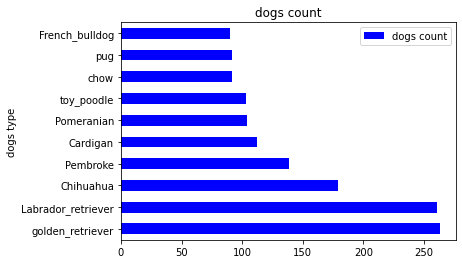

In [150]:
dogs_type ={'dogs type':['golden_retriever','Labrador_retriever','Chihuahua','Pembroke', 'Cardigan',  'Pomeranian', 'toy_poodle', 'chow','pug', 'French_bulldog'],
            'dogs count':[263,261,179,139,112,104,103,92,92,90]}
dataFrame  = pd.DataFrame(data = dogs_type);
dataFrame.plot.barh(x='dogs type', y='dogs count',title='dogs count', color='Blue')
plt.show(block=True)


#### Does the type of dogs affect the interaction?

In [151]:
twitter_archive_df_master.dog_type.value_counts()

pupper     203
doggo      63 
puppo      22 
floofer    7  
Name: dog_type, dtype: int64

In [152]:
avg_retweet_count_dog_type = twitter_archive_df_master.groupby(['dog_type']).retweet_count.mean().sort_values(ascending=False)

In [153]:
avg_retweet_count_dog_type.index

Index(['doggo', 'puppo', 'floofer', 'pupper'], dtype='object', name='dog_type')

In [154]:
avg_favorite_count_dog_type = twitter_archive_df_master.groupby(['dog_type']).favorite_count.mean().sort_values(ascending=False)

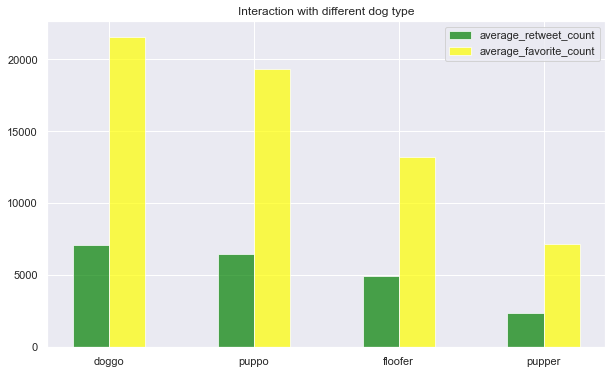

In [155]:
# plot bars
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})

width = 0.25
ind = np.arange(len(avg_favorite_count_dog_type))

red_bars = plt.bar(ind, avg_retweet_count_dog_type, width, color='Green', alpha=.7, label='average_retweet_count')
blue_bars = plt.bar(ind + width, avg_favorite_count_dog_type, width, color='Yellow', alpha=.7, label='average_favorite_count')

# title and labels
plt.title('Interaction with different dog type')
locations = ind + width / 2  # xtick locations
labels =['doggo', 'puppo', 'floofer', 'pupper']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

#### Does  dog type affects on favorite counts ?

In [156]:
#make a copy of dataframe
arc_timeseries = twitter_archive_df_master.copy()
#set the index of the arc_timeseries to be equal to the arc_timeseries["timestamp"] column.
arc_timeseries.index = arc_timeseries['timestamp']

In [157]:
#Drop the original column from the data:
arc_timeseries.drop(columns=['timestamp'], inplace=True)

In [158]:
#Sort the index
arc_timeseries.sort_index(inplace=True)


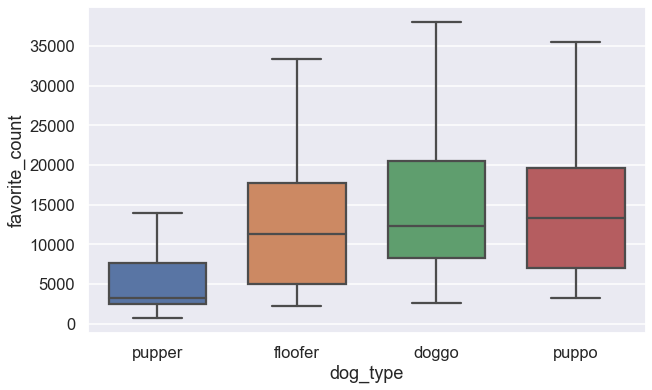

In [159]:
sns.set_context('talk')
ax = sns.boxplot(x= 'dog_type', y='favorite_count', showfliers=False, width= .70, data = arc_timeseries)
sns.set(rc={'figure.figsize':(8,20)})
plt.savefig("Dog_type_favorite_count.png")